`WU_variable_phase_generation.ipynb`

In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter
from plot_styles import set_plotstyles
set_plotstyles()
%config InlineBackend.figure_format = 'retina'

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# frequencies
# from 0.100 GHZ to 0.200 GHz, 1024 channels, 
# (9.77517107e-05 GHz per channel)
freqs = np.linspace(0.1, 0.2, 1024)

In [5]:
# delay time tau 
# from -100 ns to 100 ns
# (in steps of 5 ns)
abs_max_tau = 100 
step = 5
taus = np.arange(-abs_max_tau, abs_max_tau + step, step)

In [6]:
phases = np.linspace(0, 2* np.pi, 30)

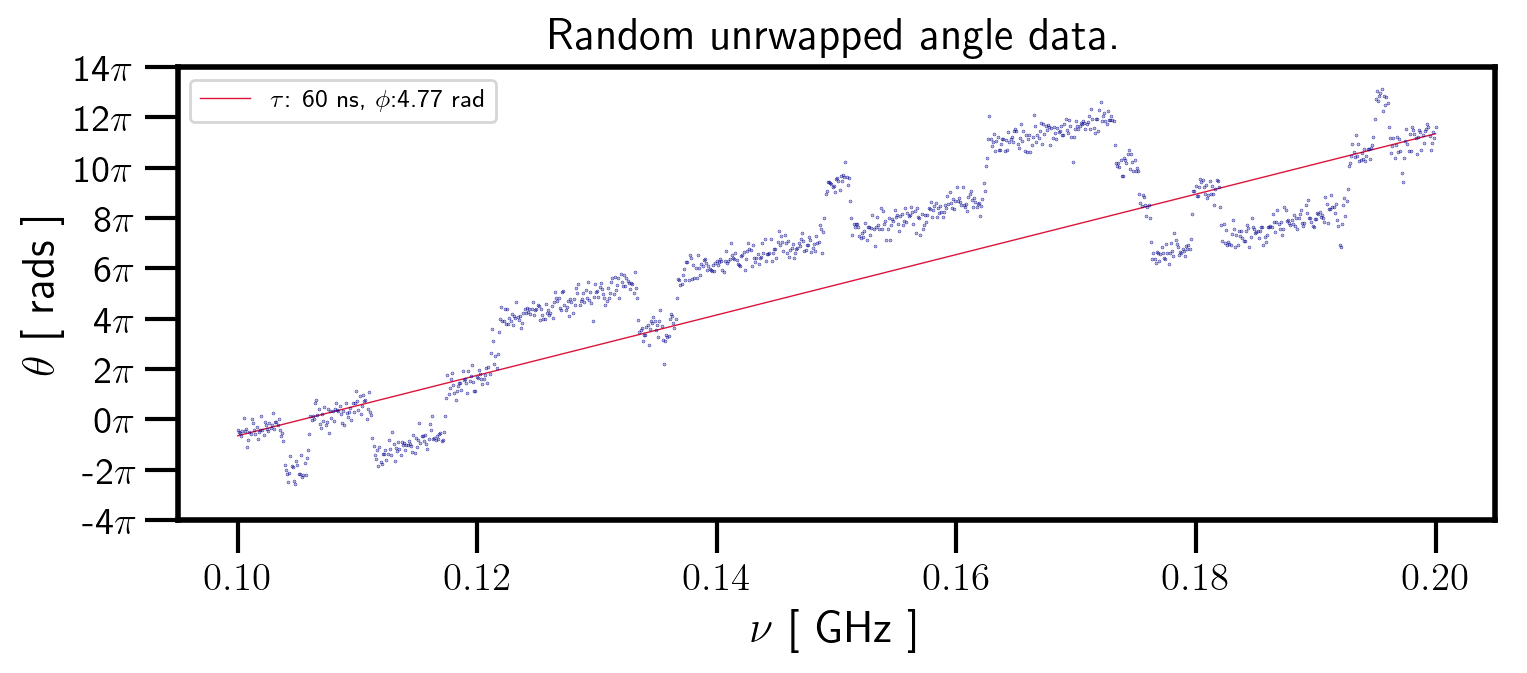

In [58]:
fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 100)
tau_choice = np.random.choice(taus)
phase_choice =  np.random.choice(phases)
angles = np.angle(np.exp(2 * np.pi * 1j * (tau_choice * freqs + phase_choice)))
uw_angles = np.unwrap(angles)
ax.plot(freqs, uw_angles,
        linewidth = 0.5,
        color = 'crimson', label = r'$\tau$: {} ns, $\phi$:{:1.2f} rad'.format(tau_choice, phase_choice))

noise = np.random.normal(size = len(angles)) 
uw_angles_noisey = np.unwrap(angles + noise)
ax.plot(freqs, uw_angles_noisey,
        ls = 'None', marker = '.', markersize = 0.5, alpha = 0.75,
        color = 'darkblue')

ax.set_ylabel(r'$\theta$ [ rads ]')
ax.set_xlabel(r'$\nu$ [ GHz ]')


ax.set_title('Random unrwapped angle data.')


ax.legend(loc = 'best', fontsize = 9)

ymax = int(2 * np.pi + 2 * np.pi * round(float(np.ceil(ax.get_ylim()[1]))/(2 * np.pi)))
ymin = int(2 * np.pi * round(float(np.floor(ax.get_ylim()[0]))/(2 * np.pi)))
ax.set_yticks(np.arange(ymin, ymax, np.pi)[::2])
ax.set_yticklabels([r"{}$\pi$".format(int(round(value / np.pi))) for value in ax.get_yticks()])

plt.show()

In [55]:
slope = np.diff(uw_angles) / (2 * np.pi) / np.diff(freqs)
print('Slope: {:2.4f}'.format(np.mean(slope)))

Slope: -75.0000


In [59]:
num_entries = 50000
rand_angle_data = np.empty((num_entries, len(freqs)))

for i in range(num_entries):
    rand_angle_data[i] = np.angle(np.exp(2 * np.pi * 1j * (np.random.choice(taus) * freqs + np.random.choice(phases))))

In [60]:
def slope(angle_data):
    return np.mean((np.diff(np.unwrap(angle_data))  / (2 * np.pi)) / np.diff(freqs))

In [61]:
slopes = [int(round(slope(angle_data))) for angle_data in rand_angle_data]

In [12]:
import pandas as pd

In [62]:
df = pd.DataFrame(rand_angle_data)

In [63]:
df.insert(0, 'slope', slopes)

In [15]:
df.to_csv('wrap_data_rand_tau_rand_phase_50000.csv', index = False)

In [64]:
rand_angle_data_noisey = np.empty((num_entries, len(freqs)))
for i, angles in enumerate(rand_angle_data):
    noise = np.random.normal(size = len(angles))
    rand_angle_data_noisey[i] = angles + noise

In [65]:
df = pd.DataFrame(rand_angle_data_noisey)
df.insert(0, 'slope', slopes)
df.to_csv('wrap_data_rand_tau_rand_phase_50000_noisey.csv', index = False)

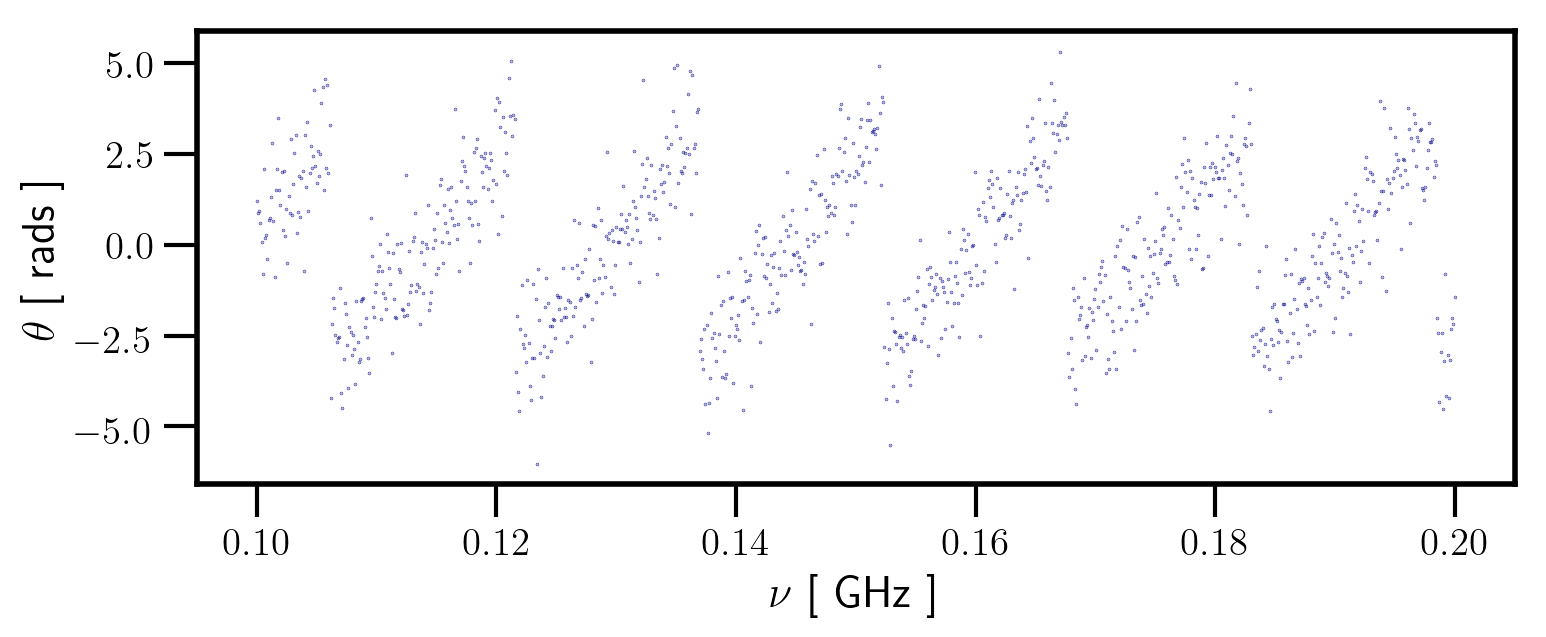

In [66]:
fig, ax = plt.subplots(figsize = (8.5, 3), dpi = 100)

uw_angles_noisey = np.unwrap(rand_angle_data_noisey[np.random.choice(range(10000))])
ax.plot(freqs, rand_angle_data_noisey[np.random.choice(range(10000))],
        ls = 'None', marker = '.', markersize = 0.5, alpha = 0.75,
        color = 'darkblue')

ax.set_ylabel(r'$\theta$ [ rads ]')
ax.set_xlabel(r'$\nu$ [ GHz ]')


# ax.set_title('Random unrwapped angle data.')


# ax.legend(loc = 'best', fontsize = 9)

# ymax = int(2 * np.pi + 2 * np.pi * round(float(np.ceil(ax.get_ylim()[1]))/(2 * np.pi)))
# ymin = int(2 * np.pi * round(float(np.floor(ax.get_ylim()[0]))/(2 * np.pi)))
# ax.set_yticks(np.arange(ymin, ymax, np.pi)[::2])
# ax.set_yticklabels([r"{}$\pi$".format(int(round(value / np.pi))) for value in ax.get_yticks()])

plt.show()